In [1]:
import os
import scipy.ndimage as ndimage
from scipy.misc import imresize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
border_size = 2
subimage_size = 100

def get_part_of_image(img, grid_height, grid_width, part_number):
    row = part_number // grid_width
    col = part_number % grid_width
    
    x_axis_start = int((1 + col) * border_size + col * subimage_size)
    x_axis_end = int(x_axis_start + subimage_size)
    
    y_axis_start = int((1 + row) * border_size + row * subimage_size)
    y_axis_end = int(y_axis_start + subimage_size)
    
    return imresize(np.copy(img[y_axis_start:y_axis_end, x_axis_start:x_axis_end, 0]), (IMG_SIZE, IMG_SIZE))

In [5]:
# q = ndimage.imread('datasets/sandia/1_layer/A1_2.png')
# a = ndimage.imread('datasets/sandia/1_layer/A1_2_Answers.png')
anss = pd.read_csv('../../datasets/sandia/data_info.csv')

In [7]:
anss.head()

,problem,answer,type,test,type_id
0,A1_1,6,1_layer,True,0
1,A1_2,3,1_layer,False,0
2,A1_3,7,1_layer,False,0
3,A1_4,1,1_layer,False,0
4,A2_1,5,1_layer,False,0


In [6]:
sizes = anss.groupby('type').size()
sizes

type
1_layer     96
2_layer    184
3_layer    499
logic       60
dtype: int64

In [10]:
anss['test'] = np.arange(len(anss)) % 10 == 0
anss['valid'] = np.arange(len(anss)) % 10 == 1
print(anss.test.mean())
print(anss.valid.mean())
print(anss[anss['test']]['valid'].mean())
print(anss[anss['valid']]['test'].mean())

0.10011918951132301
0.10011918951132301
0.0
0.0


In [12]:
anss[anss.test].groupby('type').size()

type
1_layer    10
2_layer    18
3_layer    50
logic       6
dtype: int64

In [13]:
anss[anss.valid].groupby('type').size()

type
1_layer    10
2_layer    18
3_layer    50
logic       6
dtype: int64

In [14]:
anss[~(anss.valid) & ~(anss.test)].groupby('type').size()

type
1_layer     76
2_layer    148
3_layer    399
logic       48
dtype: int64

In [9]:
anss[anss['test']]['valid'].mean()

0.0

In [16]:
anss.head()

,problem,answer,type,test,type_id,valid
0,A1_1,6,1_layer,True,0,False
1,A1_2,3,1_layer,False,0,True
2,A1_3,7,1_layer,False,0,False
3,A1_4,1,1_layer,False,0,False
4,A2_1,5,1_layer,False,0,False


In [18]:
anss.to_csv('../../datasets/sandia/data_info.csv', index=False)

In [71]:
print(q.shape)
print(a.shape)

(308, 308, 4)
(206, 410, 4)


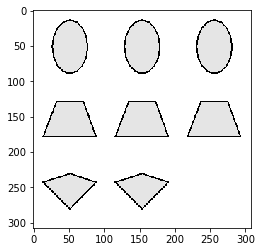

In [135]:
plt.imshow(q)

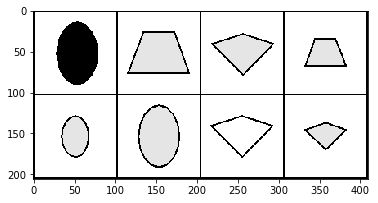

In [136]:
plt.imshow(a)

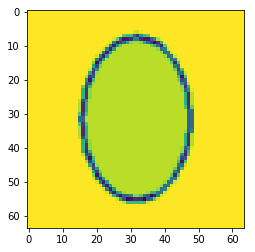

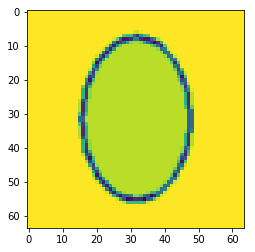

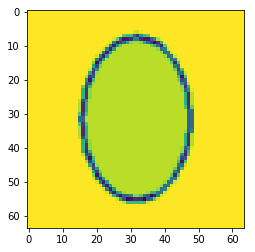

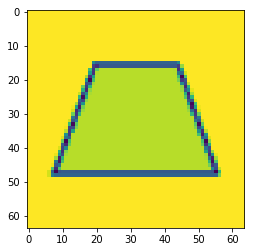

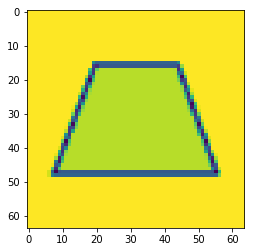

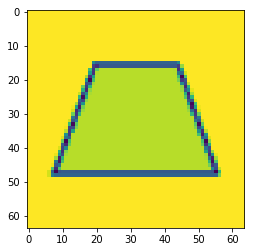

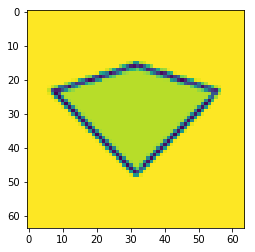

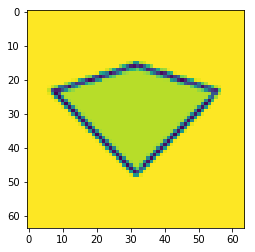

In [137]:
for i in range(8):
    plt.figure()
    plt.imshow(get_part_of_image(q, 3, 3, i))

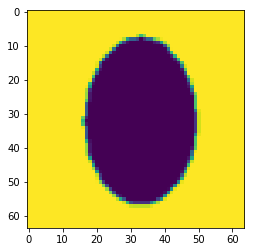

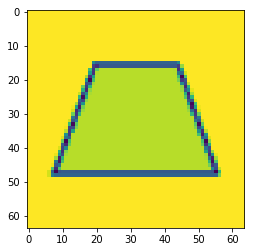

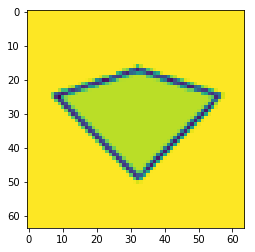

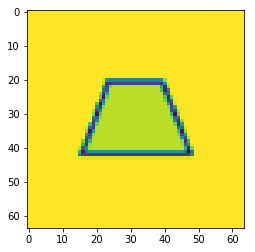

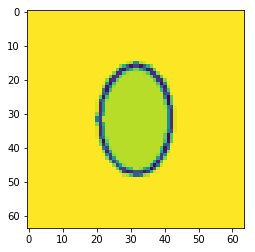

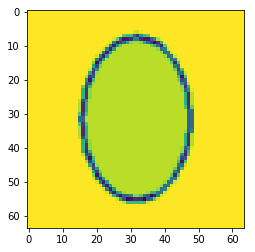

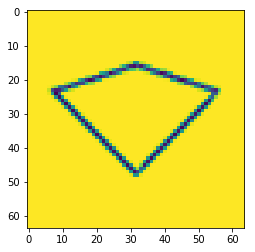

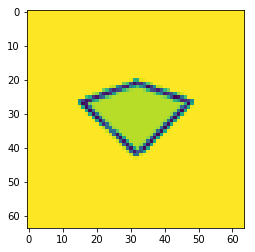

In [138]:
for i in range(8):
    plt.figure()
    plt.imshow(get_part_of_image(a, 2, 4, i))